# Анализ даных людей больных диабитом 


 ## 1. Описание  набора данных и признаков 
 

**Цель исследования**. Определить количественный показатель прогрессирования заболевания через год после исходного уровня.


**Данные.** Данные взяты с учебного пособия https://scikit-learn.ru/7-1-toy-datasets/ 

**Целевая переменая.** Характириска уровня прогресии заболевания поциента через год.

**Характеристики набора данных.** Для каждого из n = 442 пациентов с диабетом были получены десять исходных переменных, возраст, пол, индекс массы тела, среднее артериальное давление и шесть измерений сыворотки крови, а также интересующий ответ — количественный показатель прогрессирования заболевания через год после исходного уровня.

## 2. Первичный анализ данных

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import datasets

In [43]:
date = sklearn.datasets.load_diabetes()

Посмотрим на данные.

In [44]:
date

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

Данные представлены словарем. 
Преобразуем в DataFrame

In [45]:
df = pd.DataFrame(data = date.data, columns=date.feature_names)
df["target"] = date["target"]
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0000
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0000
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0000
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0000
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0000
...,...,...,...,...,...,...,...,...,...,...,...
437,0.0417,0.0507,0.0197,0.0597,-0.0057,-0.0026,-0.0287,-0.0026,0.0312,0.0072,178.0000
438,-0.0055,0.0507,-0.0159,-0.0676,0.0493,0.0792,-0.0287,0.0343,-0.0181,0.0445,104.0000
439,0.0417,0.0507,-0.0159,0.0173,-0.0373,-0.0138,-0.0250,-0.0111,-0.0469,0.0155,132.0000
440,-0.0455,-0.0446,0.0391,0.0012,0.0163,0.0153,-0.0287,0.0266,0.0445,-0.0259,220.0000


In [46]:
#df['sex'] = df['sex'].apply(lambda x: 0 if x == 0.0507 else 1 )
#df

    .возраст возраст в годах
    .пол
    .индекс массы тела bmi
    .среднее артериальное давление bp
    .s1 tc, общий холестерин сыворотки
    .s2 ldl, липопротеины низкой плотности
    .s3 hdl, липопротеины высокой плотности
    .s4 tch, общий холестерин / ЛПВП
    .s5 ltg, возможно логарифм уровня триглицеридов в сыворотке
    .s6 glu, уровень сахара в крови
    количественный показатель прогрессирования заболевания через год после исходного уровня

Даынные не целые числа, для удобного просмотра будем выводить первые 4 числа после запятой 

In [47]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

Общие, статистичесике даннные 

In [48]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,152.1335
std,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,77.0930
min,-0.1072,-0.0446,-0.0903,-0.1124,-0.1268,-0.1156,-0.1023,-0.0764,-0.1261,-0.1378,25.0000
25%,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332,87.0000
50%,0.0054,-0.0446,-0.0073,-0.0057,-0.0043,-0.0038,-0.0066,-0.0026,-0.0019,-0.0011,140.5000
75%,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279,211.5000
max,0.1107,0.0507,0.1706,0.1320,0.1539,0.1988,0.1812,0.1852,0.1336,0.1356,346.0000


Данные не содрежат пропусков, данные расположенны от -0.14 до  0.2
Странно что возротс отрицателен и дробный 

## 3. Первичный визуальный анализ данных¶

In [ ]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

Посмотрим распределение целевого признока

C:\Users\nudan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

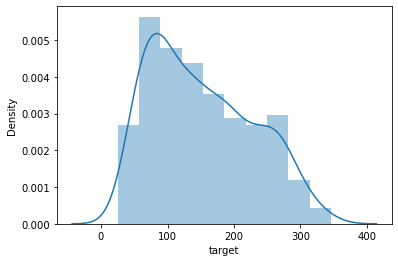

In [19]:
sns.distplot(df['target'])

Наибоьный всплекс от 0 до 100, после снижение. Как понимаю это на сколько прогресирует заболевание, у большиства это на 100 пунктов 

<AxesSubplot:>

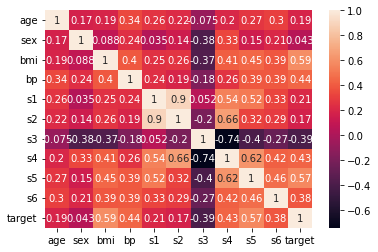

In [20]:
sns.heatmap(df.corr(), annot=True)

Видна хорошая зависемость у признаокв s1(общий холестерин сыворотки) и s2(липопротеины низкой плотности)

## 4 Подготовка тестовых и тренировочных данных  

In [25]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [13]:
X = df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]

In [14]:
y = df['target']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

Ленейная регресия, количесвенный признок 

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)
predictions = lrm.predict(X_test)

predictions1 = lrm.predict(X_train)

Отображение линейно регресиси на тренировчных данных 

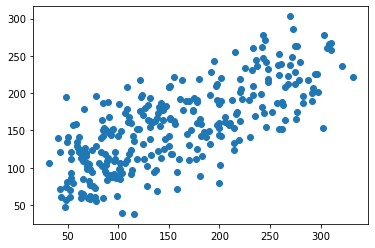

In [19]:
plt.scatter(y_train, predictions1)

Общая тенеденция наблидаеться, но данные довльно сильно разняться 

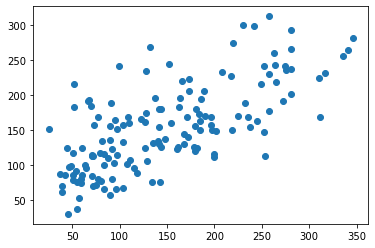

In [20]:
plt.scatter(y_test, predictions)

Отображения линейно регресиис на тестовых данных, данные сильно разбросанны

C:\Users\nudan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

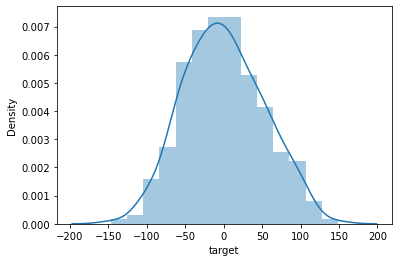

In [22]:
sns.distplot((y_train - predictions1))

C:\Users\nudan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

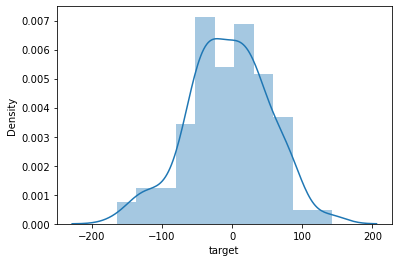

In [35]:
sns.distplot((y_test - predictions))

Тестовые данные давльно "резко" пердсталыенны, в отлиии от тренироваынх данных 

In [24]:
from sklearn import metrics

In [25]:
metrics.r2_score(y_test, predictions)

0.4710893320468663

Метрики точности оценки довольно малы 

In [26]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

Обробуем KN регресию 

In [27]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [28]:
from sklearn.metrics import r2_score

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.58
Test R2 0.47


Рузультаты такие как в линейной регресии 

In [52]:
from sklearn.tree import DecisionTreeRegressor

tree_1 = DecisionTreeRegressor(random_state=1, max_depth=9)
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, random_state=1)

In [53]:
pred_train = tree_1.predict(X_train)
pred_test = tree_1.predict(X_test)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.97
Test R2 0.00


Лес деревье преобучился на тренированчх данных, и на тестовых не показал значеммовго результата 


In [31]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

MinMaxScaler()

Нормализация данных 

In [32]:
mms.transform(X_train)

array([[0.76666667, 1.        , 0.64049587, ..., 0.42313117, 0.60082872,
        0.66666667],
       [0.38333333, 0.        , 0.28512397, ..., 0.42313117, 0.53974509,
        0.46969697],
       [0.58333333, 0.        , 0.12396694, ..., 0.14104372, 0.24998729,
        0.22727273],
       ...,
       [0.58333333, 1.        , 0.29752066, ..., 0.42313117, 0.50629032,
        0.51515152],
       [0.61666667, 1.        , 0.41322314, ..., 0.56417489, 0.11422633,
        0.28787879],
       [0.1       , 1.        , 0.19008264, ..., 0.14104372, 0.26298912,
        0.34848485]])

In [33]:
X_train_norm = pd.DataFrame(mms.transform(X_train), columns=X_train.columns)
X_train_norm

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.7667,1.0000,0.6405,0.5419,0.4559,0.4213,0.1579,0.4231,0.6008,0.6667
1,0.3833,0.0000,0.2851,0.3793,0.5245,0.4990,0.1974,0.4231,0.5397,0.4697
2,0.5833,0.0000,0.1240,0.1872,0.4461,0.3277,0.6184,0.1410,0.2500,0.2273
3,0.8333,0.0000,0.4174,0.7044,0.6716,0.5040,0.3816,0.2821,0.7090,0.2879
4,0.3000,0.0000,0.0950,0.2611,0.4314,0.4133,0.1974,0.4231,0.5126,0.4545
...,...,...,...,...,...,...,...,...,...,...
291,0.3333,0.0000,0.2025,0.1724,0.5245,0.5060,0.3026,0.2821,0.3671,0.2424
292,0.7000,1.0000,0.3140,0.2906,0.4265,0.3715,0.2105,0.4231,0.6008,0.6061
293,0.5833,1.0000,0.2975,0.7340,0.4118,0.3904,0.2105,0.4231,0.5063,0.5152
294,0.6167,1.0000,0.4132,0.2906,0.4265,0.5139,0.1184,0.5642,0.1142,0.2879


Пол стал банарным, возрораст от 0 до 1 

In [34]:
X_train_norm.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,296.0000,296.0000,296.0000,296.0000,296.0000,296.0000,296.0000,296.0000,296.0000,296.0000
mean,0.4805,0.4730,0.3481,0.4310,0.4489,0.3667,0.3476,0.2934,0.4852,0.5025
std,0.2136,0.5001,0.1777,0.2005,0.1700,0.1538,0.1660,0.1824,0.1853,0.1755
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.3167,0.0000,0.2190,0.2759,0.3284,0.2717,0.2237,0.1410,0.3514,0.3788
50%,0.5083,0.0000,0.3223,0.4089,0.4314,0.3591,0.3289,0.2821,0.4832,0.5000
75%,0.6375,1.0000,0.4628,0.5727,0.5588,0.4567,0.4474,0.4231,0.6104,0.6212
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [35]:
X_test_norm = pd.DataFrame(mms.transform(X_test), columns=X_train.columns)
X_test_norm.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,146.0000,146.0000,146.0000,146.0000,146.0000,146.0000,146.0000,146.0000,146.0000,146.0000
mean,0.5152,0.4589,0.3421,0.4378,0.4573,0.3698,0.3625,0.2891,0.4863,0.5068
std,0.2270,0.5000,0.1925,0.2128,0.1693,0.1471,0.1784,0.1818,0.1800,0.1721
min,0.0000,0.0000,0.0041,-0.0493,0.0784,0.0359,-0.0132,0.0000,0.1142,0.1212
25%,0.3375,0.0000,0.2076,0.2796,0.3346,0.2717,0.2368,0.1410,0.3671,0.3939
50%,0.5333,0.0000,0.3079,0.4089,0.4412,0.3362,0.3421,0.2821,0.4675,0.5000
75%,0.6833,1.0000,0.4866,0.5936,0.5392,0.4679,0.4737,0.4231,0.6099,0.5909
max,1.0000,1.0000,0.9628,0.8966,0.9265,0.7859,0.9868,0.8858,1.0000,1.0000


In [36]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor()

In [37]:
pred_train = knn.predict(X_train_norm)
pred_test = knn.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.57
Test R2 0.48


Обучуние на ноомральзоавнных данных KN регресия показала не заначительный прирост 

In [50]:
tree_1.fit(X_train_norm, y_train)

DecisionTreeRegressor(max_depth=9, random_state=1)

In [51]:
pred_train = tree_1.predict(X_train_norm)
pred_test = tree_1.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.97
Test R2 -0.00


Лес деревья показал старныне данных, думаю он переобучился, запомнив все тренировачные данны, думаю стоит уменьшить глубину 

In [71]:
from sklearn.tree import DecisionTreeRegressor

tree_2 = DecisionTreeRegressor(random_state=1, max_depth=3)
tree_2.fit(X_train, y_train)
pred_train1 = tree_2.predict(X_train)
pred_test1 = tree_2.predict(X_test)

print(f'Train R2 {r2_score(y_train, pred_train1):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test1):.2f}')

pred_train11 = tree_2.predict(X_train_norm)
pred_test11 = tree_2.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train11):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test11):.2f}')

Train R2 0.54
Test R2 0.36
Train R2 -1.77
Test R2 -1.85


Уменьшив глубину мы получилу лучшеи рузультат на не нормальзававнных тестовыых данных 

In [72]:
lrm.fit(X_train_norm, y_train)

LinearRegression()

In [73]:
pred_train = lrm.predict(X_train_norm)
pred_test = lrm.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.53
Test R2 0.47


Нормалтзация не линейно регресии сказалось не большим увеличеним рещультата 

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [56]:
X_train_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_train_std

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,1.3417,1.0556,1.6479,0.5542,0.0412,0.3558,-1.1441,0.7123,0.6253,0.9370
1,-0.4557,-0.9473,-0.3548,-0.2580,0.4454,0.8618,-0.9060,0.7123,0.2951,-0.1873
2,0.4821,-0.9473,-1.2630,-1.2179,-0.0166,-0.2540,1.6340,-0.8367,-1.2714,-1.5710
3,1.6542,-0.9473,0.3904,1.3664,1.3117,0.8942,0.2053,-0.0622,1.2103,-1.2251
4,-0.8464,-0.9473,-1.4260,-0.8487,-0.1032,0.3039,-0.9060,0.7123,0.1484,-0.2738
...,...,...,...,...,...,...,...,...,...,...
291,-0.6901,-0.9473,-0.8206,-1.2917,0.4454,0.9072,-0.2710,-0.0622,-0.6381,-1.4845
292,1.0291,1.0556,-0.1918,-0.7010,-0.1321,0.0315,-0.8266,0.7123,0.6253,0.5911
293,0.4821,1.0556,-0.2850,1.5141,-0.2187,0.1547,-0.8266,0.7123,0.1142,0.0722
294,0.6384,1.0556,0.3671,-0.7010,-0.1321,0.9591,-1.3822,1.4869,-2.0054,-1.2251


In [57]:
X_train_std.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,296.0000,296.0000,296.0000,296.0000,296.0000,296.0000,296.0000,296.0000,296.0000,296.0000
mean,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000
std,1.0017,1.0017,1.0017,1.0017,1.0017,1.0017,1.0017,1.0017,1.0017,1.0017
min,-2.2530,-0.9473,-1.9616,-2.1532,-2.6443,-2.3882,-2.0966,-1.6113,-2.6229,-2.8682
25%,-0.7683,-0.9473,-0.7274,-0.7749,-0.7096,-0.6189,-0.7472,-0.8367,-0.7233,-0.7062
50%,0.1304,-0.9473,-0.1452,-0.1103,-0.1032,-0.0496,-0.1122,-0.0622,-0.0106,-0.0143
75%,0.7360,1.0556,0.6465,0.7080,0.6476,0.5861,0.6022,0.7123,0.6773,0.6775
max,2.4357,1.0556,3.6738,2.8432,3.2464,4.1247,3.9359,3.8802,2.7833,2.8396


Стандартицация не сильно изменила данные 